In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("bhatbhateni_synthetic_dataset_complex.csv")

In [5]:
df.shape

(11000, 15)

In [4]:
df.head(60)

,TransactionID,CustomerType,ProductCategory,Product,Quantity,PricePerUnit,TotalAmount,PaymentMethod,StoreLocation,Date,WeatherCondition,TrafficStatus,StoreMusicPlaying,EmployeeOnDuty,NearbyEvents
0,TX00001,Guest,Personal Care,Soap,1.0,1162.68,1162.68,Credit Card,Pokhara,2024-01-01 00:00:00,Sunny,Light,Rock,David,Political Rally
1,TX00002,Regular,Toys & Games,Rubik's Cube,1.0,1085.59,1085.59,Debit Card,Biratnagar,2024-01-01 01:00:00,Sunny,Light,Pop,Sarah,Concert
2,TX00003,NaN,Dairy Products,Condensed Milk,2.0,274.18,548.36,Cash,Chitwan,2024-01-01 02:00:00,Snowy,Light,No Music,David,NaN
3,TX00004,Guest,Dairy Products,Milk,1.0,837.96,837.96,Credit Card,Biratnagar,2024-01-01 03:00:00,Cloudy,Light,Jazz,Michael,NaN
4,TX00005,Regular,Electronics,Mobile Phone,1.0,1299.26,1299.26,Debit Card,Chitwan,NaN,Sunny,Light,Pop,John,Sports Event
5,TX00006,Guest,NaN,Banana,3.0,1693.42,5080.26,Debit Card,Chitwan,2024-01-01 05:00:00,NaN,Moderate,Rock,Michael,Festival
6,TX00007,Guest,Bakery,Cake,5.0,801.75,4008.75,Mobile Payment,Chitwan,2024-01-01 06:00:00,Rainy,Heavy,Rock,John,Sports Event
7,TX00008,Regular,Snacks,Granola Bars,5.0,1514.89,7574.45,Cash,Bhairahawa,2024-01-01 07:00:00,Snowy,Light,Jazz,John,Concert
8,TX00009,Guest,Clothing,Jacket,4.0,499.12,1996.48,Mobile Payment,Kathmandu,2024-01-01 08:00:00,Rainy,Moderate,Rock,Emily,Political Rally
9,TX00010,Member,Frozen Foods,Frozen Waffles,2.0,1054.49,2108.98,Mobile Payment,Bhairahawa,2024-01-01 09:00:00,Windy,Heavy,No Music,John,NaN


In [5]:
#Unwanted colums are deleted
df = df.drop(['StoreMusicPlaying','TrafficStatus','NearbyEvents'], axis=1)

In [4]:
#Dataset Overview
print("Dataset Overview:")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Columns with Missing Values:\n{df.isnull().sum()}\n")

Dataset Overview:
Total Rows: 11000
Total Columns: 15
Columns with Missing Values:
TransactionID           0
CustomerType          550
ProductCategory       550
Product               550
Quantity              545
PricePerUnit          600
TotalAmount           666
PaymentMethod         550
StoreLocation         550
Date                  550
WeatherCondition      550
TrafficStatus         550
StoreMusicPlaying     550
EmployeeOnDuty        550
NearbyEvents         2626
dtype: int64



In [123]:
df.describe()

,Quantity,PricePerUnit,TotalAmount
count,11000.000000,11000.000000,11000.000000
mean,6.171742,1042.245627,6389.123415
std,33.175978,540.076620,39176.759906
min,0.167523,100.110000,100.690000
25%,2.000000,578.900000,1295.070000
50%,3.000000,1042.245627,2580.775000
75%,4.000000,1495.977500,4709.302500
max,497.000000,1999.720000,910071.240000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      11000 non-null  object 
 1   CustomerType       10450 non-null  object 
 2   ProductCategory    10450 non-null  object 
 3   Product            10450 non-null  object 
 4   Quantity           10455 non-null  float64
 5   PricePerUnit       10400 non-null  object 
 6   TotalAmount        10334 non-null  float64
 7   PaymentMethod      10450 non-null  object 
 8   StoreLocation      10450 non-null  object 
 9   Date               10450 non-null  object 
 10  WeatherCondition   10450 non-null  object 
 11  TrafficStatus      10450 non-null  object 
 12  StoreMusicPlaying  10450 non-null  object 
 13  EmployeeOnDuty     10450 non-null  object 
 14  NearbyEvents       8374 non-null   object 
dtypes: float64(2), object(13)
memory usage: 1.3+ MB


In [6]:
#Datatype of Quantity colums is changed to float from string
df['PricePerUnit'] = pd.to_numeric(df['PricePerUnit'], errors='coerce')


In [7]:
#Handling missing value 
df['CustomerType'].fillna("Guest",inplace = True)
df['ProductCategory'].fillna("AllCategory",inplace = True)
df['Product'].fillna("AllProduct",inplace = True)
#filling missing value with mean and using other colums
df['Quantity'].fillna(df['TotalAmount']/df['PricePerUnit'] ,inplace = True)
df['Quantity'].fillna(df['Quantity'].mean(),inplace = True)
#filling missing value with mean and using other colums
df['PricePerUnit'].fillna(df['TotalAmount']/df['Quantity'] ,inplace = True)
df['PricePerUnit'].fillna(df['PricePerUnit'].mean() ,inplace = True)
#filling missing value with mean and using other colums
df['TotalAmount'].fillna(df['Quantity']*df['PricePerUnit'],inplace = True )
df['TotalAmount'].fillna(df['TotalAmount'].mean() ,inplace = True )

df['PaymentMethod'].fillna('Cash',inplace = True)
df['StoreLocation'].fillna("UnknownLocation",inplace = True)
#filling null date with forward and backward dates
df['Date'].ffill(inplace = True)
df['Date'].bfill(inplace = True)
#filling null Employee with forward and backward Employee
df['EmployeeOnDuty'].ffill(inplace = True)
df['EmployeeOnDuty'].bfill(inplace = True)
#filling null Weather with forward and backward Weather
df['WeatherCondition'].ffill(inplace = True)
df['WeatherCondition'].bfill(inplace = True)

Text(0.5, 0, 'PricePerUnit')

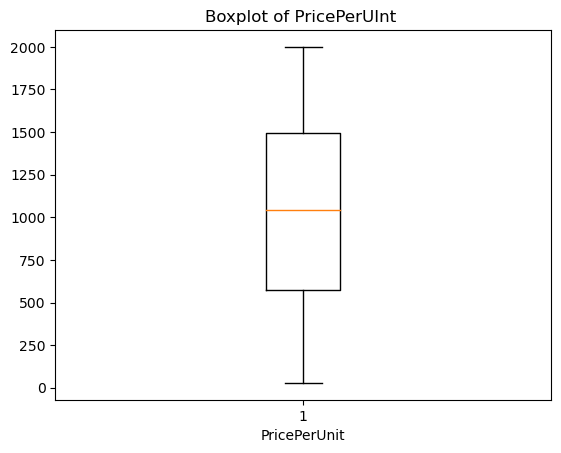

In [32]:
#Finding outliers in Quantity colums using boxplot
plt.boxplot(df["PricePerUnit"])
plt.title("Boxplot of PricePerUInt ")
plt.xlabel("PricePerUnit")

Text(0.5, 0, 'Quantity')

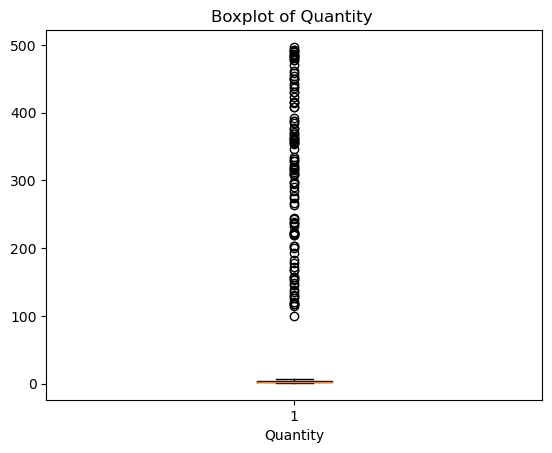

In [31]:
#Finding outliers in Quantity colums using boxplot
plt.boxplot(df["Quantity"])
plt.title("Boxplot of Quantity ")
plt.xlabel("Quantity")

Text(0.5, 0, 'TotalAmount')

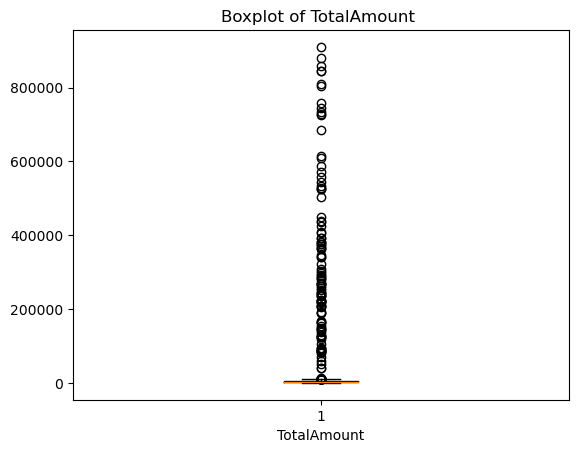

In [30]:
#Finding outliers in TotalAmount colums using boxplot
plt.boxplot(df["TotalAmount"])
plt.title("Boxplot of TotalAmount ")
plt.xlabel("TotalAmount")

In [126]:
#Highlights key Statistic
print(f"Quantity: Ranges from {df['Quantity'].min()} to {df['Quantity'].max()} (Mean: {df['Quantity'].mean()})")
print(f"PricePerUnit: Ranges from {df['PricePerUnit'].min()} to {df['PricePerUnit'].max()} (Mean: {df['PricePerUnit'].mean()})")
print(f"AmountPerOrder: Ranges from {df['TotalAmount'].min()} to {df['TotalAmount'].max()} (Mean: {df['TotalAmount'].mean()})")

Quantity: Ranges from 0.16752289039646695 to 497.0 (Mean: 6.171741903846402)
PricePerUnit: Ranges from 100.11 to 1999.72 (Mean: 1042.2456273693945)
AmountPerOrder: Ranges from 100.69 to 910071.24 (Mean: 6389.123414703491)



Metrics by Product Category:
Axes(0.125,0.11;0.775x0.77)


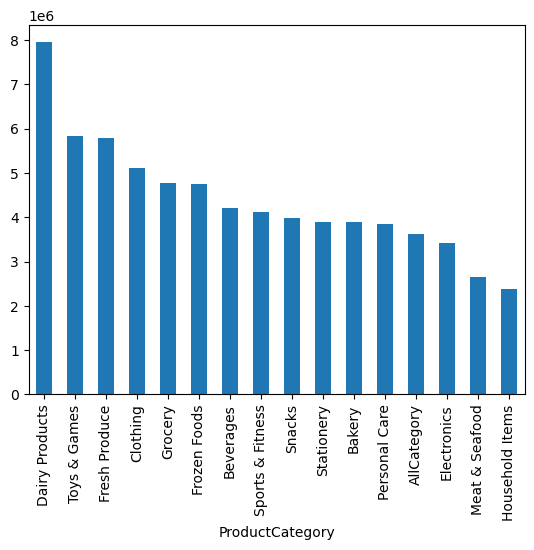

In [41]:
# Breakdown by Product Category
category_metrics = df.groupby("ProductCategory").agg(
    Total_Sales=("TotalAmount", "sum"),
    Average_Sales=("TotalAmount", "mean"),
    Total_Orders=("TransactionID", "count"),
).sort_values(by="Total_Sales", ascending=False)
print("\nMetrics by Product Category:")
#plotting in bar graph 
print(category_metrics['Total_Sales'].plot.bar())

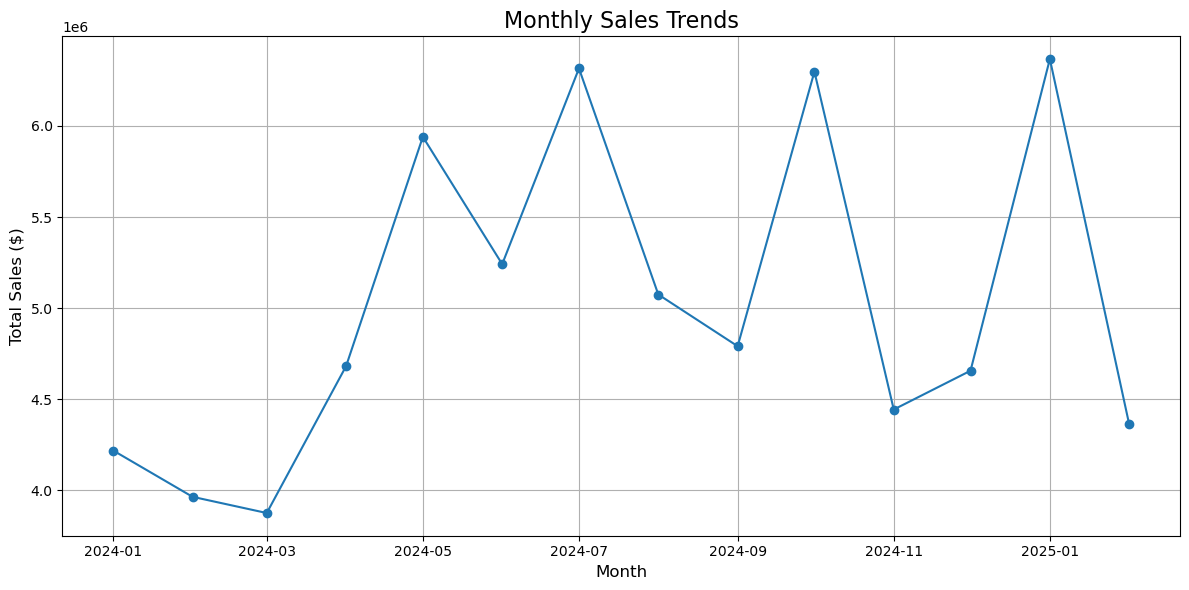

In [65]:
#Time-Series Analysis Monthly Sales Trends
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg(
    Total_Sales=("TotalAmount", "sum")
)
# Reset index for plotting
monthly_sales.reset_index(inplace=True)
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Plotting monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Total_Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

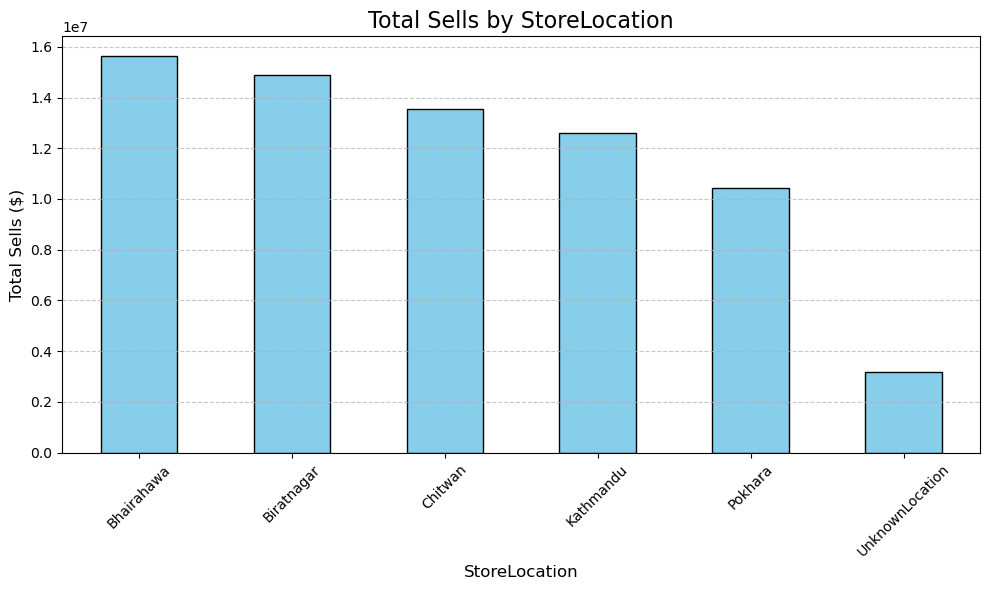

In [71]:
# Profit Analysis by Location
# Grouping data by StoreLocation for Profit Analysis
StoreLocation = df.groupby("StoreLocation").agg(
    Total_Sales=("TotalAmount", "sum"),
    #Average_Sales=("TotalAmount", "mean"),
    #Order_Count=("Quantity", "count")
).sort_values(by="Total_Sales", ascending=False)

# Visualizing the Profit by Region
plt.figure(figsize=(10, 6))
StoreLocation["Total_Sales"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sells by StoreLocation', fontsize=16)
plt.xlabel('StoreLocation', fontsize=12)
plt.ylabel('Total Sells ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


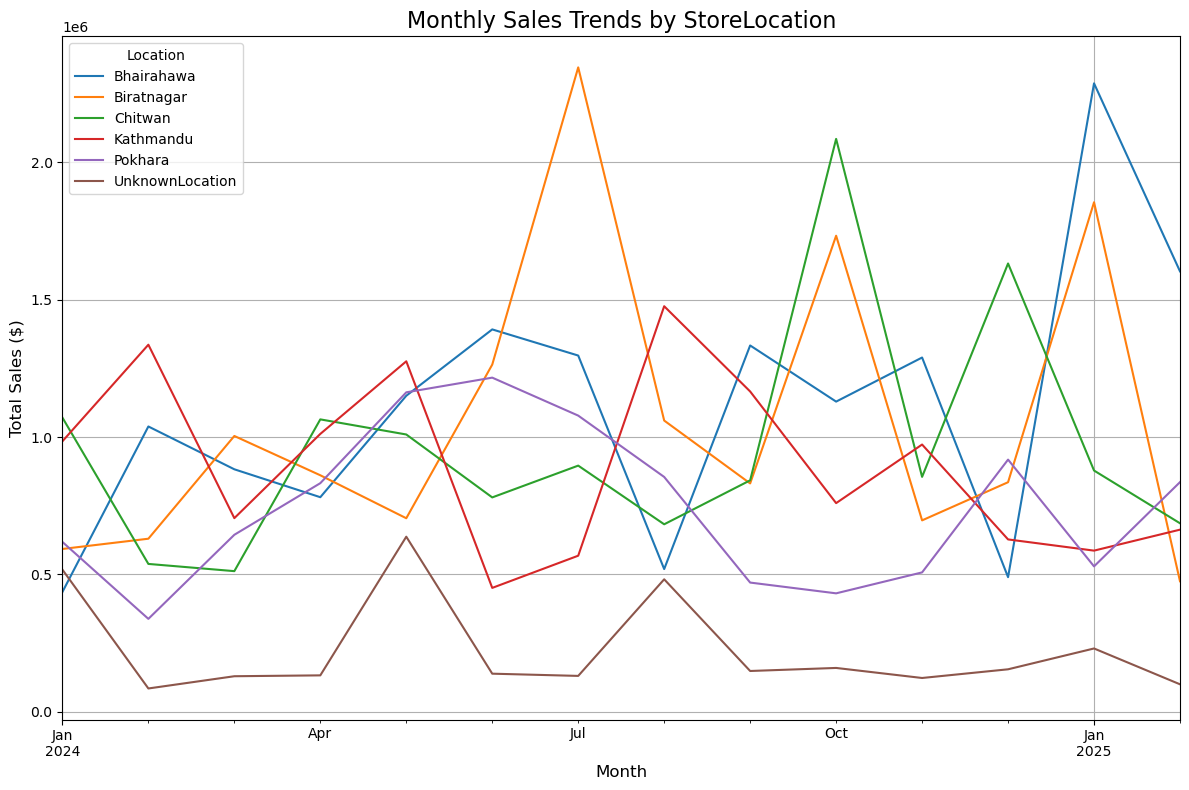

In [75]:
# Sales Trends by Region
# Grouping data by Region and Month for Sales Trends
sales_trends_storelocation = df.groupby(
    [df['Date'].dt.to_period("M"), "StoreLocation"]
).agg(Total_Sales=("TotalAmount", "sum")).reset_index()

# Converting Period to Timestamp for plotting
sales_trends_storelocation['Date'] = sales_trends_storelocation['Date'].dt.to_timestamp()

# Pivot data for visualization
sales_trends_pivot = sales_trends_storelocation.pivot(index='Date', columns='StoreLocation', values='Total_Sales')

# Plotting Sales Trends by Region
plt.figure(figsize=(12, 8))
sales_trends_pivot.plot(ax=plt.gca())
plt.title('Monthly Sales Trends by StoreLocation', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Location', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


Top 15 Product by Sales:
                 Total_sales  Total_quantity
Product                                     
AllProduct      3.647173e+06             550
Condensed Milk  1.782677e+06              66
Trousers        1.622209e+06              95
Ginger          1.481922e+06              68
Frozen Soup     1.437926e+06              67
Yogurt          1.294692e+06              77
Paneer          1.193424e+06              68
Pastry          1.122483e+06              78
Beef Steak      1.073115e+06              67
Salt            1.068995e+06              68
Potato          1.059757e+06              59
Juice           1.048870e+06              72
Iced Tea        1.038134e+06              58
Chocolate       1.029320e+06              73
Yo-Yo           1.028285e+06              65


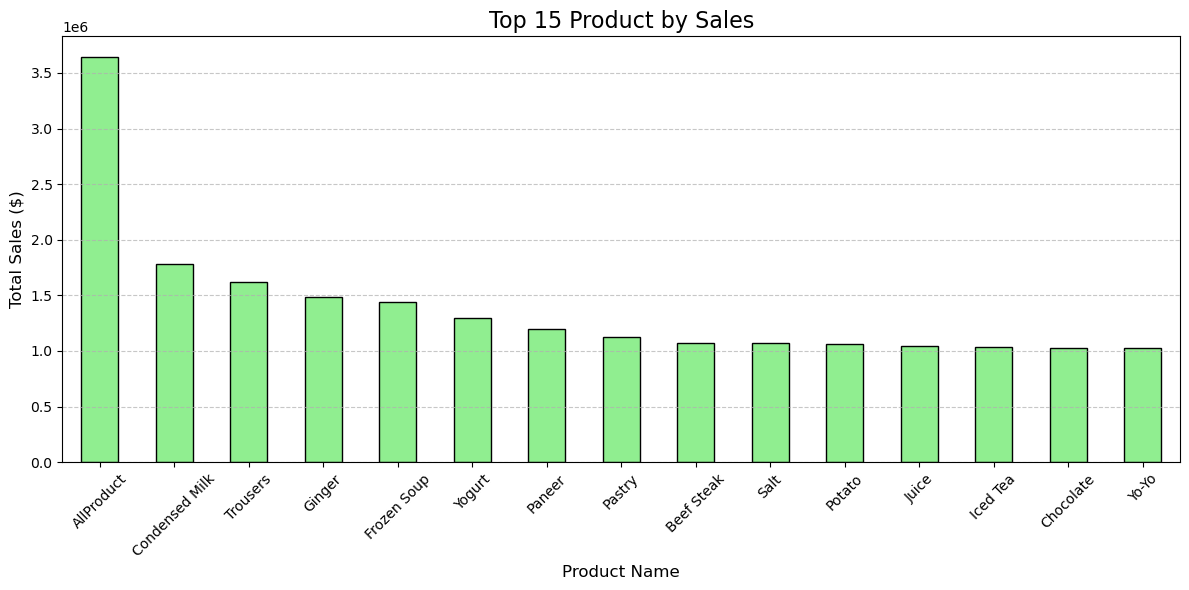

In [94]:
#Tob 20 most selling items
top_selling_product = df.groupby("Product").agg(
    Total_sales = ("TotalAmount",'sum'),
    Total_quantity =("Quantity",'count')
).sort_values(by="Total_sales", ascending=False).head(15)

# Displaying Top Product by Most Sales in a readable tabular format
print("Top 15 Product by Sales:")
print(top_selling_product)

# Plotting Top 10 Product by Sales
plt.figure(figsize=(12, 6))
top_selling_product["Total_sales"].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 15 Product by Sales', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [95]:
df.head(2)

,TransactionID,CustomerType,ProductCategory,Product,Quantity,PricePerUnit,TotalAmount,PaymentMethod,StoreLocation,Date,WeatherCondition,EmployeeOnDuty
0,TX00001,Guest,Personal Care,Soap,1.0,1162.68,1162.68,Credit Card,Pokhara,2024-01-01 00:00:00,Sunny,David
1,TX00002,Regular,Toys & Games,Rubik's Cube,1.0,1085.59,1085.59,Debit Card,Biratnagar,2024-01-01 01:00:00,Sunny,Sarah


Top Sales by Customes Types:
               Total_sales  Total_quantity
CustomerType                              
Member        2.609342e+07            3568
Regular       2.214301e+07            3337
Guest         2.199828e+07            4095


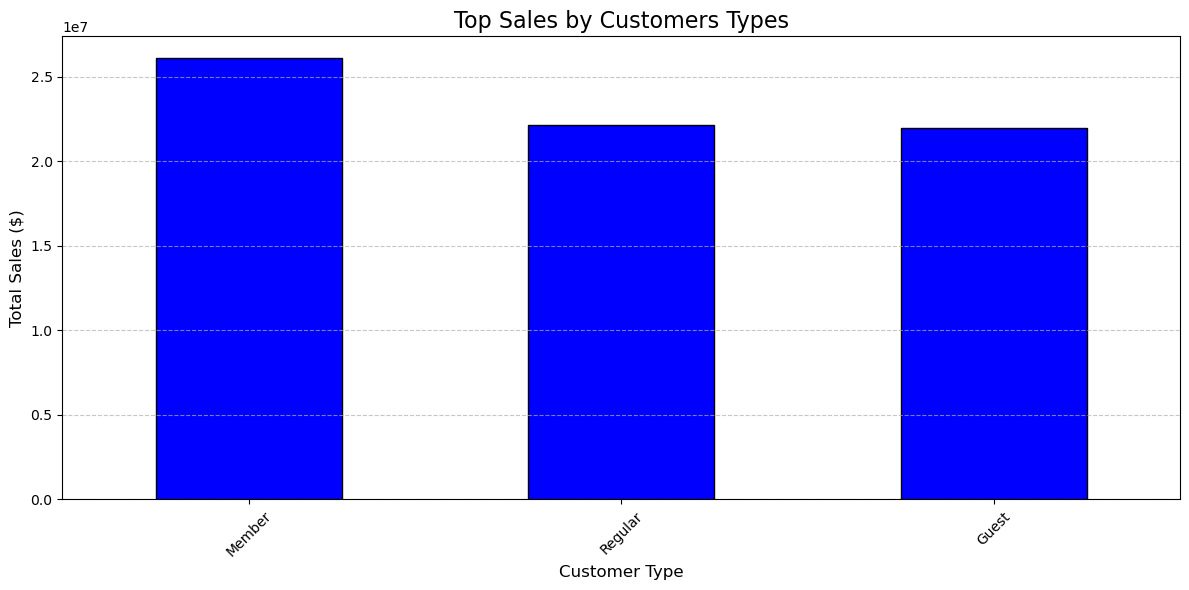

In [100]:
#Sales by types of Customers
sales_by_customers = df.groupby("CustomerType").agg(
    Total_sales = ("TotalAmount",'sum'),
    Total_quantity =("Quantity",'count')
).sort_values(by="Total_sales", ascending=False).head(15)

# Displaying Top Product by Most Sales in a readable tabular format
print("Top Sales by Customes Types:")
print(sales_by_customers)

# Plotting Top 10 Product by Sales
plt.figure(figsize=(12, 6))
sales_by_customers["Total_sales"].plot(kind='bar', color='blue', edgecolor='black')
plt.title('Top Sales by Customers Types', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Axes: xlabel='PaymentMethod'>

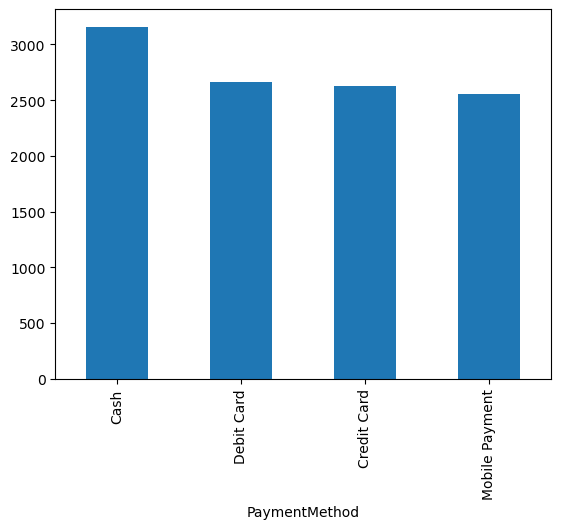

In [102]:
#Method of payments used by customers
df['PaymentMethod'].value_counts().plot.bar()

In [123]:
#Time-Series Analysis Daily Sales Trends
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby(df['Date'].dt.to_period("d")).agg(
    Average_Daily_Sales=("TotalAmount", "sum"),
    Average_Daily_Order=("TransactionID",'count')
)
print("Average Daily Sales and Orders: ")
print(daily_sales.mean())

Average Daily Sales and Orders: 
Average_Daily_Sales    168428.557989
Average_Daily_Order        26.378897
dtype: float64


In [142]:
#most selliing product based on store location 
top_selling= df.groupby(["StoreLocation",'Product']).agg(
    top_product = ("Product",'count')
).sort_values("top_product",ascending = False)
print(top_selling)

                            top_product
StoreLocation   Product                
Biratnagar      AllProduct          122
Chitwan         AllProduct          108
Pokhara         AllProduct          102
Bhairahawa      AllProduct           96
Kathmandu       AllProduct           91
...                                 ...
UnknownLocation Beef Steak            1
                Cream                 1
                Spices                1
                Golf Ball             1
                Jeans                 1

[891 rows x 1 columns]


<Axes: xlabel='EmployeeOnDuty'>

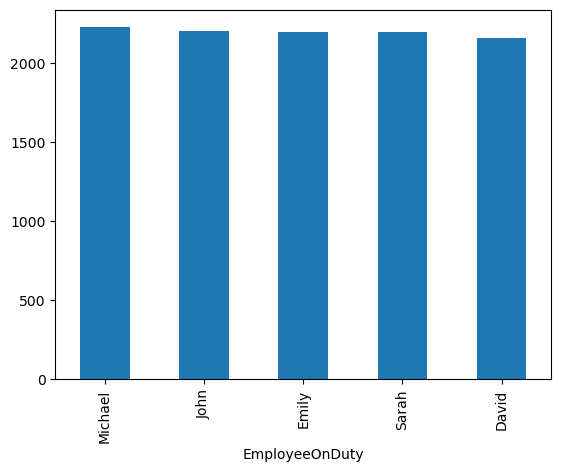

In [144]:
df['EmployeeOnDuty'].value_counts().plot.bar()

In [148]:
#most selliing product based on store location 
top_selling= df.groupby("WeatherCondition").agg(
    top_product = ("TotalAmount",'sum')
).sort_values("top_product",ascending = False)
print(top_selling)

                   top_product
WeatherCondition              
Windy             1.564606e+07
Cloudy            1.398314e+07
Rainy             1.394801e+07
Sunny             1.363875e+07
Snowy             1.301875e+07
